In [2]:
# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [4]:
# Function to load specific datasets
def load_datasets(dataset):
    # Determine the current working directory
    current_dir = os.getcwd()
    
    # Create the path to the raw_data directory relative to the current directory
    base_dir = os.path.abspath(os.path.join(current_dir, "..", "raw_data"))
    
    # List of all files in the base directory
    all_files = os.listdir(base_dir)
    
    # Create the path to the dataset files
    dataset_files = [f for f in all_files if f.startswith(f"Dataset_{dataset[-1]}_")]
    
    datasets = {}
    for filename in dataset_files:
        file_path = os.path.join(base_dir, filename)
        # Key name for the dictionary
        key_name = filename.replace(f"Dataset_{dataset[-1]}_", '').replace('.csv', '')
        datasets[key_name] = pd.read_csv(file_path)

    return datasets

## Exploring Data Set A: 2023 US Civil Flights 2023

#### Load Data Set A

In [5]:
# Set varianle for data set A - US 2023 Kaggle Civil Flights
dataset_a = "Dataset_A"

# Load data set A
dataset_a_files = load_datasets(dataset_a)

In [6]:
#Explore all files in data set A
print("Data files in Dataset_A:")
for key in dataset_a_files.keys():
    print(key)

Data files in Dataset_A:
US2023_Kaggle_US_Flights_January 2024
US2023_Kaggle_US_Flights_2023
US2023_Kaggle_Weather_Meteo_By_Airport
US2023_Kaggle_Cancelled_Diverted_2023
US2023_Kaggle_Airports_Geolocation


In [7]:
da_flights_2024 = dataset_a_files['US2023_Kaggle_US_Flights_January 2024']
da_flights_2023 = dataset_a_files['US2023_Kaggle_US_Flights_2023']
da_weather = dataset_a_files['US2023_Kaggle_Weather_Meteo_By_Airport']
da_cancelled_flights = dataset_a_files['US2023_Kaggle_Cancelled_Diverted_2023']
da_airports = dataset_a_files['US2023_Kaggle_Airports_Geolocation']

In [8]:
#Inspect 2023 Flights
da_flights_2023.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10


In [9]:
da_flights_2023.columns

Index(['FlightDate', 'Day_Of_Week', 'Airline', 'Tail_Number', 'Dep_Airport',
       'Dep_CityName', 'DepTime_label', 'Dep_Delay', 'Dep_Delay_Tag',
       'Dep_Delay_Type', 'Arr_Airport', 'Arr_CityName', 'Arr_Delay',
       'Arr_Delay_Type', 'Flight_Duration', 'Distance_type', 'Delay_Carrier',
       'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft',
       'Manufacturer', 'Model', 'Aicraft_age'],
      dtype='object')

In [10]:
#Inspect Weather data set
da_weather.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE


In [11]:
da_weather.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres',
       'airport_id'],
      dtype='object')

In [12]:
#Inspect Cancelled data set
da_cancelled_flights.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,...,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft
0,2023-01-25,3,Endeavor Air,N691CA,1.0,0.0,JFK,"New York, NY",Evening,0.0,...,"Ithaca/Cortland, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
1,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,MSP,"Minneapolis, MN",Morning,0.0,...,"Pittsburgh, PA",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
2,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,PIT,"Pittsburgh, PA",Afternoon,0.0,...,"Minneapolis, MN",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
3,2023-01-11,3,Endeavor Air,N926XJ,1.0,0.0,BWI,"Baltimore, MD",Afternoon,0.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
4,2023-01-25,3,Endeavor Air,N335PQ,0.0,1.0,BWI,"Baltimore, MD",Afternoon,2.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0


#### Perform Basic EDA on Data Set A

#### Exploring each file in data set A separately

* US2023_Kaggle_US_Flights_January 2024
* US2023_Kaggle_US_Flights_2023
* US2023_Kaggle_Weather_Meteo_By_Airport
* US2023_Kaggle_Cancelled_Diverted_2023
* US2023_Kaggle_Airports_Geolocation

#### US Flights 2023

In [13]:
print("\nUS Flights 2023 - Missing Values:")
print(da_flights_2023.isnull().sum())


US Flights 2023 - Missing Values:
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
Manufacturer          0
Model                 0
Aicraft_age           0
dtype: int64


In [14]:
print("\nUS Flights 2023 - Duplicate Records:")
print(da_flights_2023.duplicated().sum())


US Flights 2023 - Duplicate Records:
31


In [15]:
# Identify duplicated rows in da_flights_2023
duplicates = da_flights_2023[da_flights_2023.duplicated(keep=False)]

# Display the duplicated rows
print("Duplicated Records in US Flights 2023:")
print(duplicates)

Duplicated Records in US Flights 2023:
         FlightDate  Day_Of_Week                       Airline Tail_Number  \
303832   2023-01-11            3        Southwest Airlines Co.      N8790Q   
303833   2023-01-11            3        Southwest Airlines Co.      N8790Q   
307246   2023-01-12            4        Southwest Airlines Co.      N8715Q   
307247   2023-01-12            4        Southwest Airlines Co.      N8715Q   
345834   2023-01-23            1        Southwest Airlines Co.      N8715Q   
...             ...          ...                           ...         ...   
6022592  2023-11-16            4         Skywest Airlines Inc.      N194SY   
6399141  2023-12-12            2  American Eagle Airlines Inc.      N233NN   
6415478  2023-12-12            2  American Eagle Airlines Inc.      N233NN   
6666485  2023-12-07            4        American Airlines Inc.      N960NN   
6698735  2023-12-07            4        American Airlines Inc.      N960NN   

        Dep_Airport     

In [16]:
# Display unique duplicated rows
unique_duplicates = duplicates.drop_duplicates()
print("Unique Duplicated Records in US Flights 2023:")
print(unique_duplicates)

Unique Duplicated Records in US Flights 2023:
         FlightDate  Day_Of_Week                       Airline Tail_Number  \
303832   2023-01-11            3        Southwest Airlines Co.      N8790Q   
307246   2023-01-12            4        Southwest Airlines Co.      N8715Q   
345834   2023-01-23            1        Southwest Airlines Co.      N8715Q   
799577   2023-02-27            1        Southwest Airlines Co.      N235WN   
1042853  2023-03-23            4         Skywest Airlines Inc.      N823SK   
1331332  2023-03-03            5        Southwest Airlines Co.      N8787K   
1399754  2023-03-14            2        Southwest Airlines Co.      N8546V   
1723167  2023-04-11            2         Skywest Airlines Inc.      N823SK   
1742040  2023-04-19            3         Skywest Airlines Inc.      N823SK   
2538068  2023-05-22            1        Southwest Airlines Co.      N8775Q   
2565681  2023-05-06            6              Republic Airways      N824MD   
2624448  2023-05-1

In [17]:
print("\nUS Flights 2023 - Statistical Summary:")
print(da_flights_2023.describe())


US Flights 2023 - Statistical Summary:
        Day_Of_Week     Dep_Delay  Dep_Delay_Tag     Arr_Delay  \
count  6.743404e+06  6.743404e+06   6.743404e+06  6.743404e+06   
mean   3.982793e+00  1.220099e+01   3.790013e-01  6.627152e+00   
std    2.001762e+00  5.507936e+01   4.851385e-01  5.707892e+01   
min    1.000000e+00 -9.900000e+01   0.000000e+00 -1.190000e+02   
25%    2.000000e+00 -5.000000e+00   0.000000e+00 -1.500000e+01   
50%    4.000000e+00 -2.000000e+00   0.000000e+00 -6.000000e+00   
75%    6.000000e+00  9.000000e+00   1.000000e+00  9.000000e+00   
max    7.000000e+00  4.413000e+03   1.000000e+00  4.405000e+03   

       Flight_Duration  Delay_Carrier  Delay_Weather     Delay_NAS  \
count     6.743404e+06   6.743404e+06   6.743404e+06  6.743404e+06   
mean      1.402978e+02   5.169804e+00   7.428505e-01  2.566957e+00   
std       7.287216e+01   3.645732e+01   1.435393e+01  1.500484e+01   
min       0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%       8.700

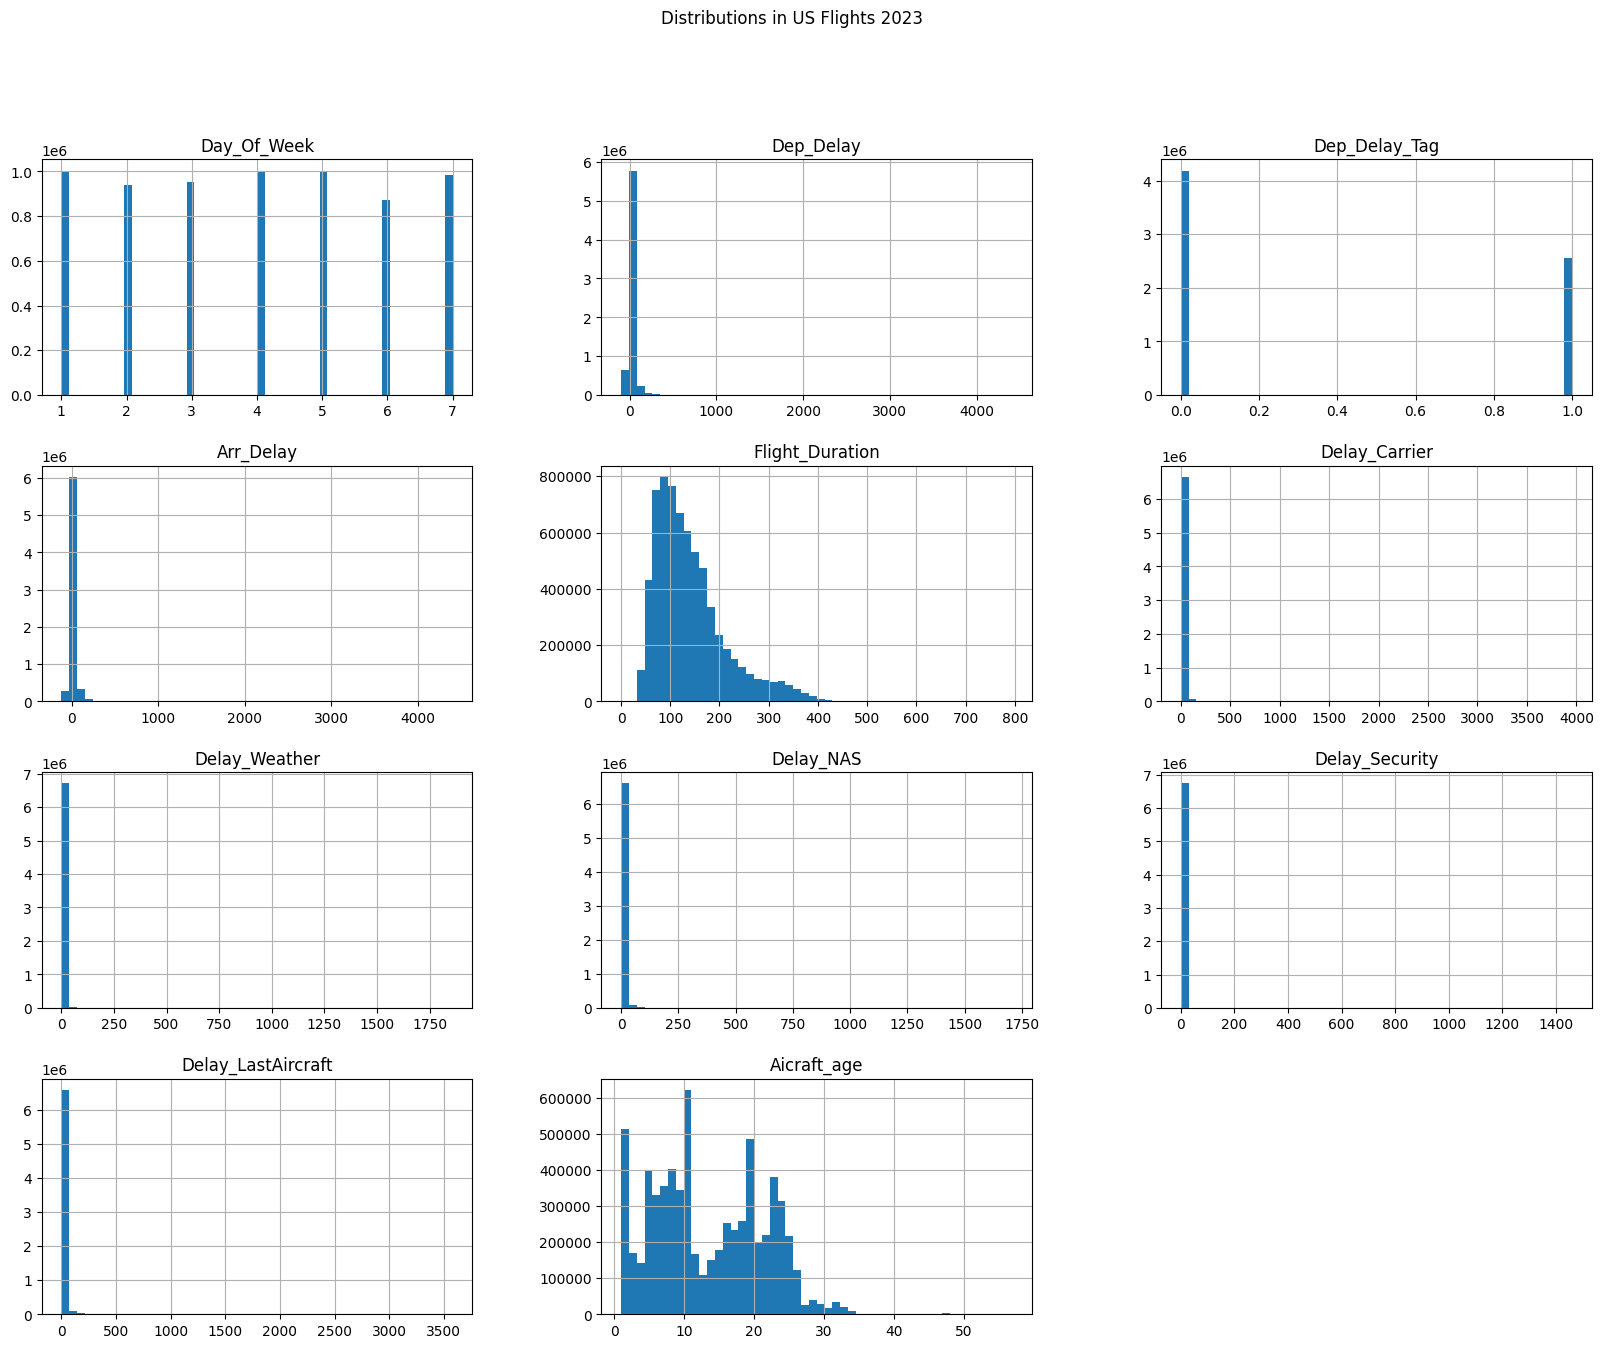

In [18]:
da_flights_2023.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distributions in US Flights 2023")
plt.show()

#### US Weather

In [19]:
print("Missing values in Weather Meteo By Airport:")
print(da_weather.isnull().sum())

Missing values in Weather Meteo By Airport:
time          0
tavg          0
tmin          0
tmax          0
prcp          0
snow          0
wdir          0
wspd          0
pres          0
airport_id    0
dtype: int64


In [20]:
print("Duplicate records in Weather Meteo By Airport:")
print(da_weather.duplicated().sum())

Duplicate records in Weather Meteo By Airport:
0


In [21]:
print("Statistical summary of Weather Meteo By Airport:")
print(da_weather.describe())

Statistical summary of Weather Meteo By Airport:
                tavg           tmin           tmax           prcp  \
count  132860.000000  132860.000000  132860.000000  132860.000000   
mean       14.042641       8.699833      19.617149       2.520604   
std        10.672859      10.680441      11.392223       7.915755   
min       -39.100000     -76.000000     -35.000000       0.000000   
25%         6.300000       1.100000      11.700000       0.000000   
50%        15.400000       9.400000      21.200000       0.000000   
75%        22.500000      17.200000      28.900000       1.000000   
max        42.200000      37.200000      50.000000     571.500000   

                snow           wdir           wspd           pres  
count  132860.000000  132860.000000  132860.000000  132860.000000  
mean        6.810131     188.686042      12.424556    1015.650368  
std        50.935283     114.629099       6.211261       6.944599  
min         0.000000       0.000000       0.000000     96

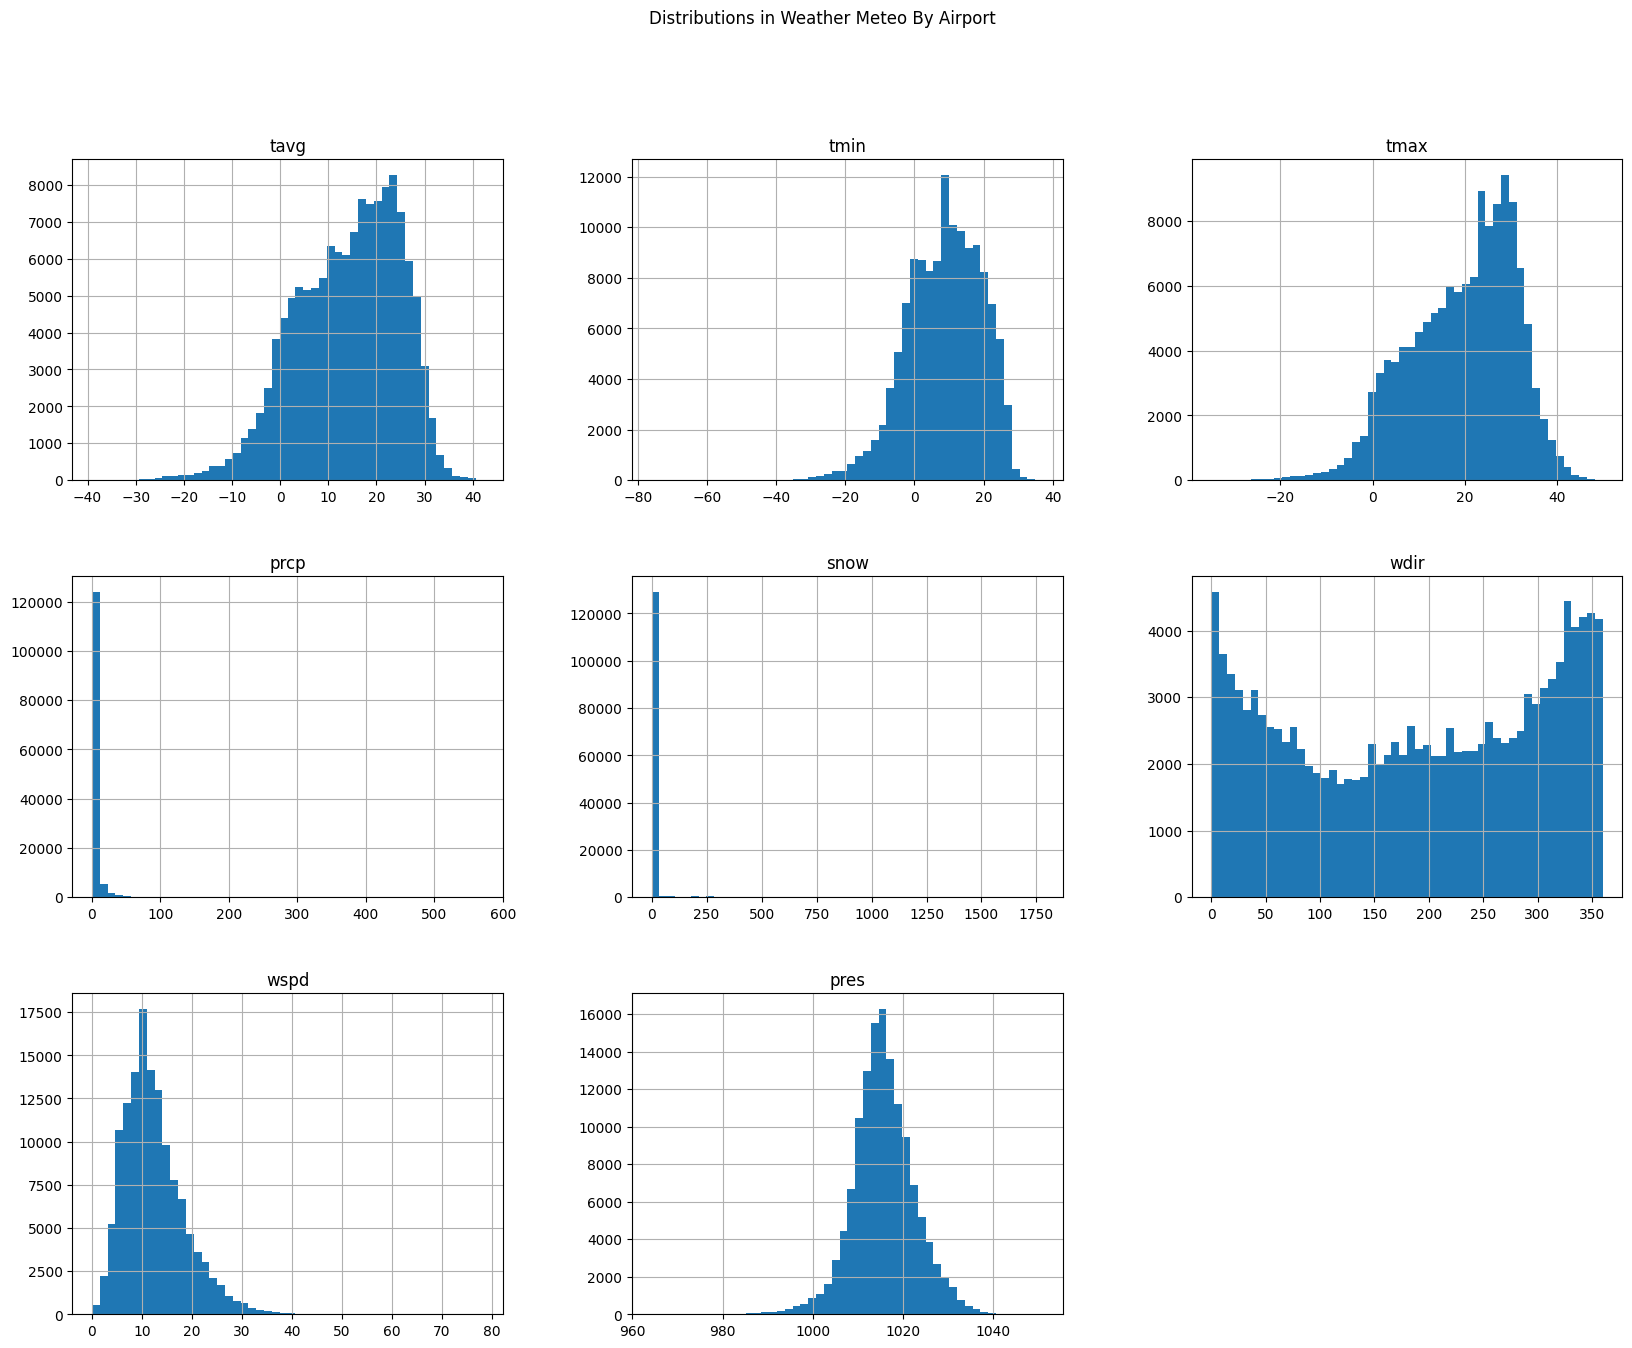

In [22]:
da_weather.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distributions in Weather Meteo By Airport")
plt.show()

#### Cancelled Flights

In [23]:
print("Missing values in Cancelled Diverted 2023:")
print(da_cancelled_flights.isnull().sum())

Missing values in Cancelled Diverted 2023:
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Cancelled             0
Diverted              0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
dtype: int64


In [24]:
print("Duplicate records in Cancelled Diverted 2023:")
print(da_cancelled_flights.duplicated().sum())

Duplicate records in Cancelled Diverted 2023:
945


In [25]:
# Identify duplicated rows in da_cancelled_flights
duplicates = da_cancelled_flights[da_cancelled_flights.duplicated(keep=False)]

# Display the duplicated rows
print("Duplicated Records in Cancelled Diverted 2023:")
print(duplicates)

Duplicated Records in Cancelled Diverted 2023:
        FlightDate  Day_Of_Week          Airline Tail_Number  Cancelled  \
21      2023-01-22            7     Endeavor Air      N8877A        1.0   
117     2023-01-23            1     Endeavor Air      N133EV        1.0   
132     2023-01-22            7     Endeavor Air      N8877A        1.0   
140     2023-01-23            1     Endeavor Air      N133EV        1.0   
142     2023-01-23            1     Endeavor Air      N901XJ        1.0   
...            ...          ...              ...         ...        ...   
103915  2023-12-18            1     Endeavor Air      N491PX        1.0   
104374  2023-12-18            1  JetBlue Airways      N323JB        1.0   
104379  2023-12-18            1  JetBlue Airways      N323JB        1.0   
104395  2023-12-18            1  JetBlue Airways      N283JB        1.0   
104397  2023-12-18            1  JetBlue Airways      N283JB        1.0   

        Diverted Dep_Airport        Dep_CityName Dep

In [26]:
# Display unique duplicated rows
unique_duplicates = duplicates.drop_duplicates()
print("Unique Duplicated Records in Cancelled Diverted Flights:")
print(unique_duplicates)

Unique Duplicated Records in Cancelled Diverted Flights:
        FlightDate  Day_Of_Week                 Airline Tail_Number  \
21      2023-01-22            7            Endeavor Air      N8877A   
117     2023-01-23            1            Endeavor Air      N133EV   
142     2023-01-23            1            Endeavor Air      N901XJ   
925     2023-01-09            1  American Airlines Inc.      N680AW   
3484    2023-01-17            2  Frontier Airlines Inc.           0   
...            ...          ...                     ...         ...   
103511  2023-12-14            4  Southwest Airlines Co.      N8870K   
103846  2023-12-18            1            Endeavor Air      N491PX   
103876  2023-12-26            2            Endeavor Air      N324PQ   
104374  2023-12-18            1         JetBlue Airways      N323JB   
104395  2023-12-18            1         JetBlue Airways      N283JB   

        Cancelled  Diverted Dep_Airport        Dep_CityName DepTime_label  \
21           

In [27]:
print("Statistical summary of Cancelled Diverted 2023:")
print(da_cancelled_flights.describe())

Statistical summary of Cancelled Diverted 2023:
         Day_Of_Week      Cancelled       Diverted      Dep_Delay  \
count  104488.000000  104488.000000  104488.000000  104488.000000   
mean        3.967374       0.841589       0.158411       7.798848   
std         2.021840       0.365127       0.365127      49.621610   
min         1.000000       0.000000       0.000000     -31.000000   
25%         2.000000       1.000000       0.000000       0.000000   
50%         4.000000       1.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       0.000000   
max         7.000000       1.000000       1.000000    2414.000000   

       Dep_Delay_Tag  Arr_Delay  Flight_Duration  Delay_Carrier  \
count  104488.000000   104488.0         104488.0       104488.0   
mean        0.093743        0.0              0.0            0.0   
std         0.291472        0.0              0.0            0.0   
min         0.000000        0.0              0.0            0.

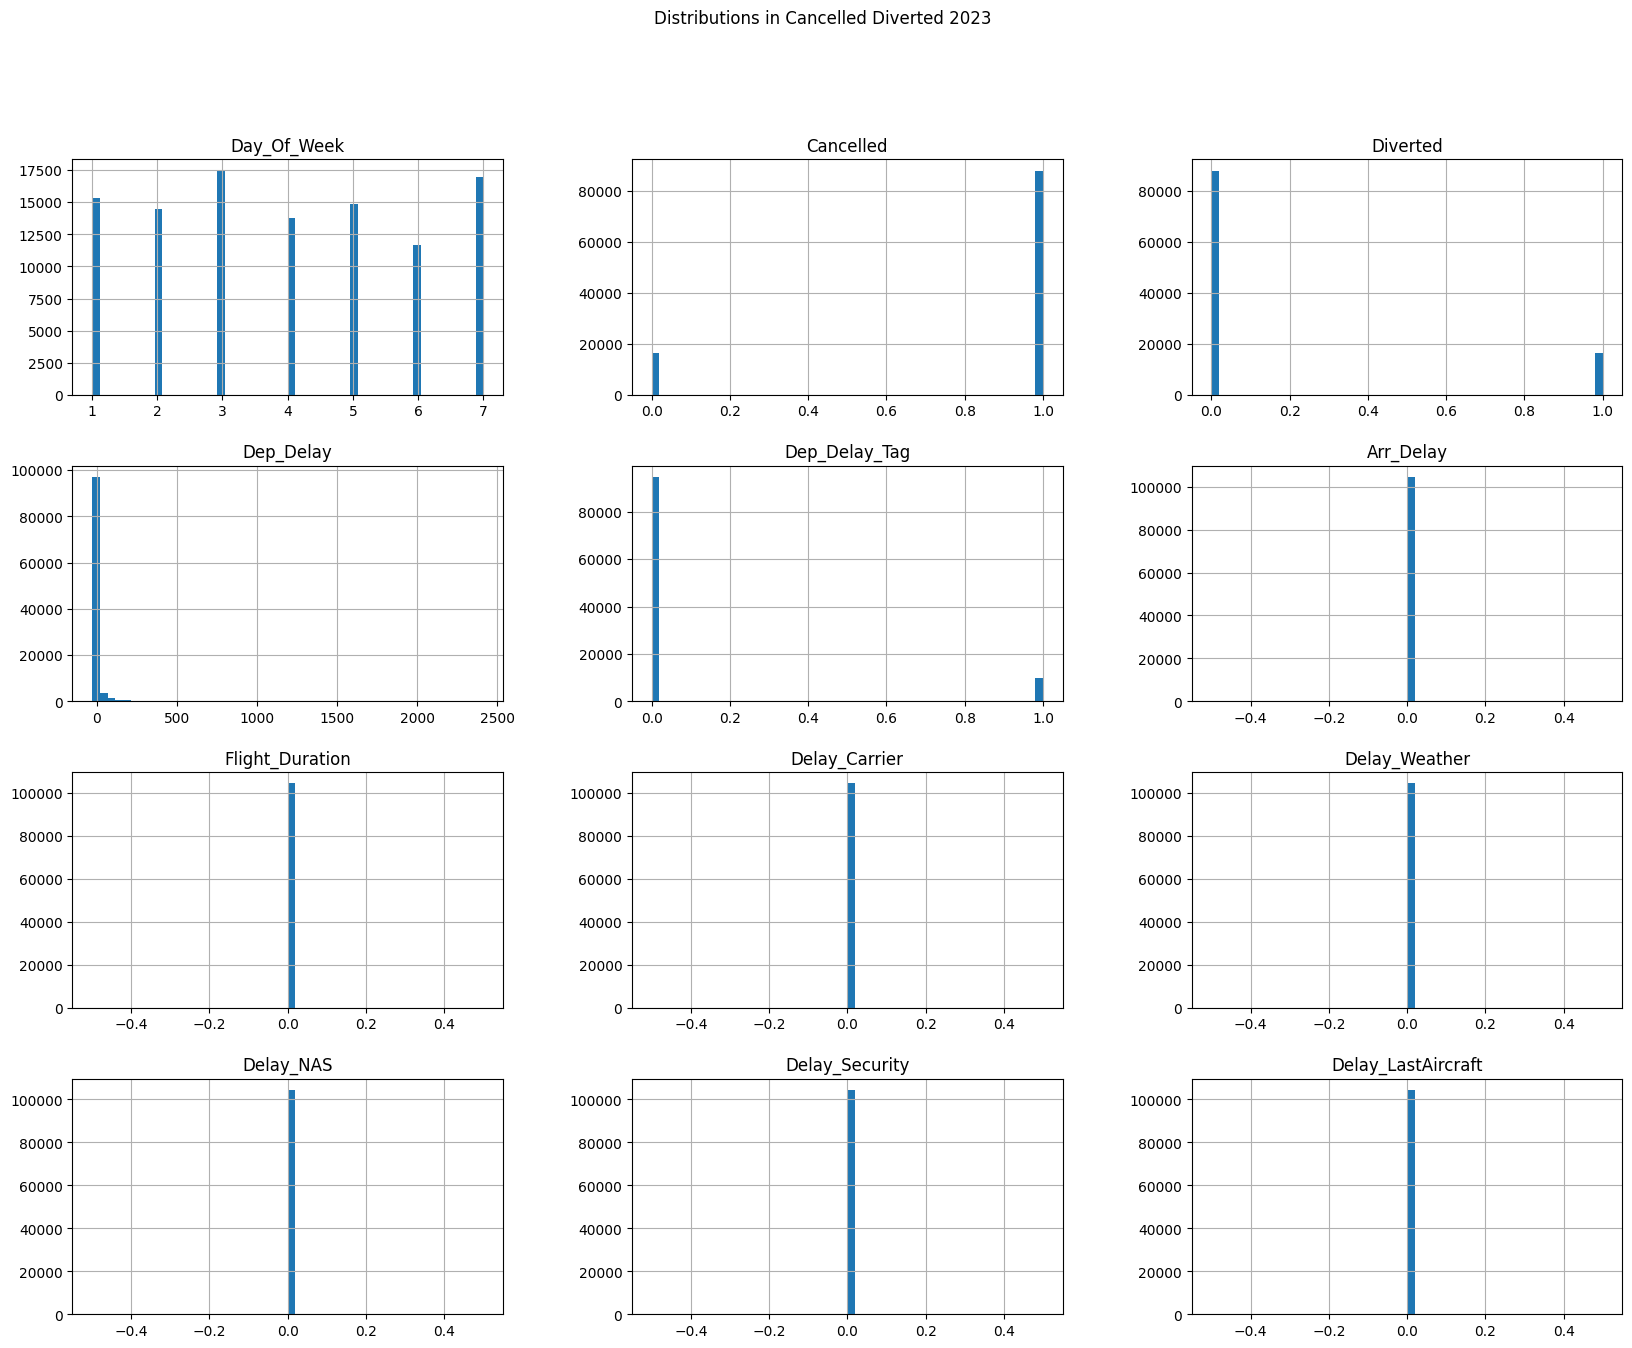

In [28]:
da_cancelled_flights.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distributions in Cancelled Diverted 2023")
plt.show()

### EDA on Combined Files

In [29]:
#Ensure dates are in the right format
da_flights_2023['FlightDate'] = pd.to_datetime(da_flights_2023['FlightDate'])
da_weather['time'] = pd.to_datetime(da_weather['time'])

In [30]:
#Rename columns to match
da_flights_2023 = da_flights_2023.rename(columns={'FlightDate': 'date', 'Dep_Airport': 'airport_id'})

print(da_flights_2023.head())


        date  Day_Of_Week       Airline Tail_Number airport_id  Dep_CityName  \
0 2023-01-02            1  Endeavor Air      N605LR        BDL  Hartford, CT   
1 2023-01-03            2  Endeavor Air      N605LR        BDL  Hartford, CT   
2 2023-01-04            3  Endeavor Air      N331PQ        BDL  Hartford, CT   
3 2023-01-05            4  Endeavor Air      N906XJ        BDL  Hartford, CT   
4 2023-01-06            5  Endeavor Air      N337PQ        BDL  Hartford, CT   

  DepTime_label  Dep_Delay  Dep_Delay_Tag Dep_Delay_Type  ... Flight_Duration  \
0       Morning         -3              0      Low <5min  ...              56   
1       Morning         -5              0      Low <5min  ...              62   
2       Morning         -5              0      Low <5min  ...              49   
3       Morning         -6              0      Low <5min  ...              54   
4       Morning         -1              0      Low <5min  ...              50   

        Distance_type  Delay_Car

In [31]:
#Rename columns to match
da_weather = da_weather.rename(columns={'time': 'date'})

print(da_weather.head())

        date  tavg  tmin  tmax  prcp  snow   wdir  wspd    pres airport_id
0 2023-01-01   8.1   2.2  11.7   0.0   0.0  278.0   9.7  1013.8        ABE
1 2023-01-02   5.4   0.0  11.7   0.0   0.0  353.0   3.6  1019.6        ABE
2 2023-01-03   8.4   7.2   9.4  15.2   0.0   50.0   5.0  1013.9        ABE
3 2023-01-04  11.1   6.7  17.2   0.0   0.0  302.0   4.7  1009.8        ABE
4 2023-01-05  12.7   6.7  14.4   7.9   0.0  292.0   7.2  1013.0        ABE


In [32]:
# Merge flight data with weather data
da_flights_weather = pd.merge(da_flights_2023, da_weather, on=['date', 'airport_id'], how='inner')

# Print the first few rows of the merged dataframe
print(da_flights_weather.head())

        date  Day_Of_Week       Airline Tail_Number airport_id  Dep_CityName  \
0 2023-01-02            1  Endeavor Air      N605LR        BDL  Hartford, CT   
1 2023-01-03            2  Endeavor Air      N605LR        BDL  Hartford, CT   
2 2023-01-04            3  Endeavor Air      N331PQ        BDL  Hartford, CT   
3 2023-01-05            4  Endeavor Air      N906XJ        BDL  Hartford, CT   
4 2023-01-06            5  Endeavor Air      N337PQ        BDL  Hartford, CT   

  DepTime_label  Dep_Delay  Dep_Delay_Tag Dep_Delay_Type  ... Model  \
0       Morning         -3              0      Low <5min  ...   CRJ   
1       Morning         -5              0      Low <5min  ...   CRJ   
2       Morning         -5              0      Low <5min  ...   CRJ   
3       Morning         -6              0      Low <5min  ...   CRJ   
4       Morning         -1              0      Low <5min  ...   CRJ   

  Aicraft_age  tavg tmin  tmax  prcp  snow   wdir  wspd    pres  
0          16   2.9 -2.1  

In [33]:
#Check for data types
da_flights_weather.dtypes

date                  datetime64[ns]
Day_Of_Week                    int64
Airline                       object
Tail_Number                   object
airport_id                    object
Dep_CityName                  object
DepTime_label                 object
Dep_Delay                      int64
Dep_Delay_Tag                  int64
Dep_Delay_Type                object
Arr_Airport                   object
Arr_CityName                  object
Arr_Delay                      int64
Arr_Delay_Type                object
Flight_Duration                int64
Distance_type                 object
Delay_Carrier                  int64
Delay_Weather                  int64
Delay_NAS                      int64
Delay_Security                 int64
Delay_LastAircraft             int64
Manufacturer                  object
Model                         object
Aicraft_age                    int64
tavg                         float64
tmin                         float64
tmax                         float64
p

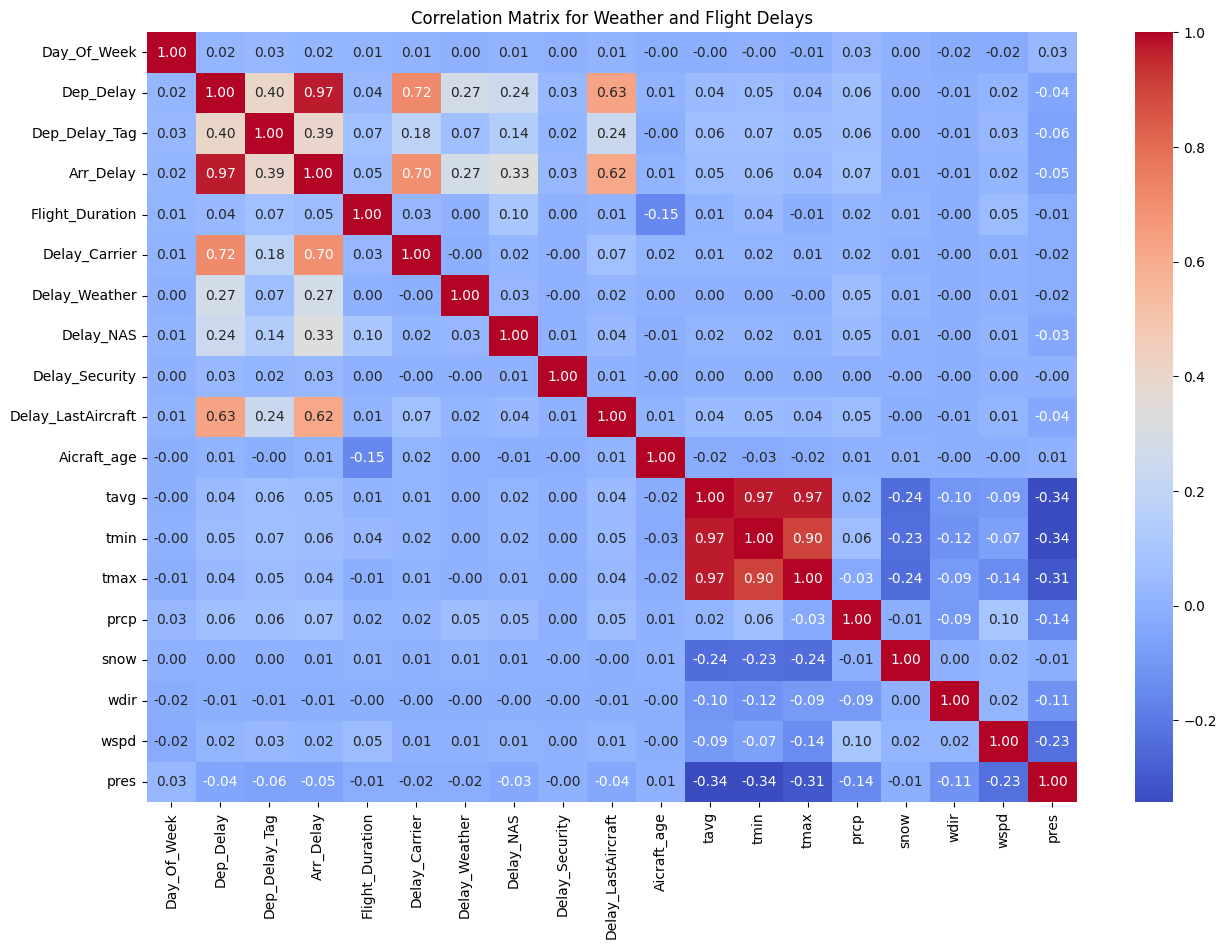

In [34]:
# Select only the numeric columns for correlation analysis
da_flights_weather_numeric = da_flights_weather.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = da_flights_weather_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Weather and Flight Delays")
plt.show()

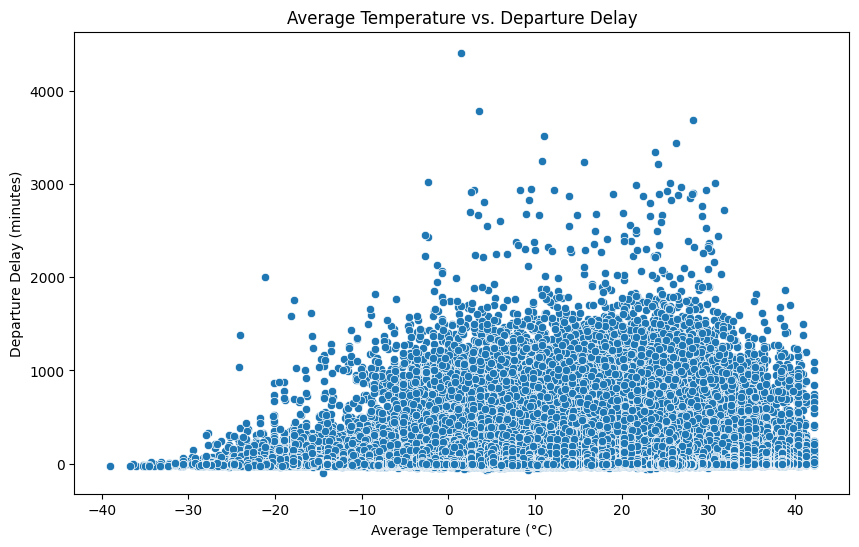

In [35]:
# Scatter plot of average temperature vs. departure delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tavg', y='Dep_Delay', data=da_flights_weather)
plt.title("Average Temperature vs. Departure Delay")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Departure Delay (minutes)")
plt.show()

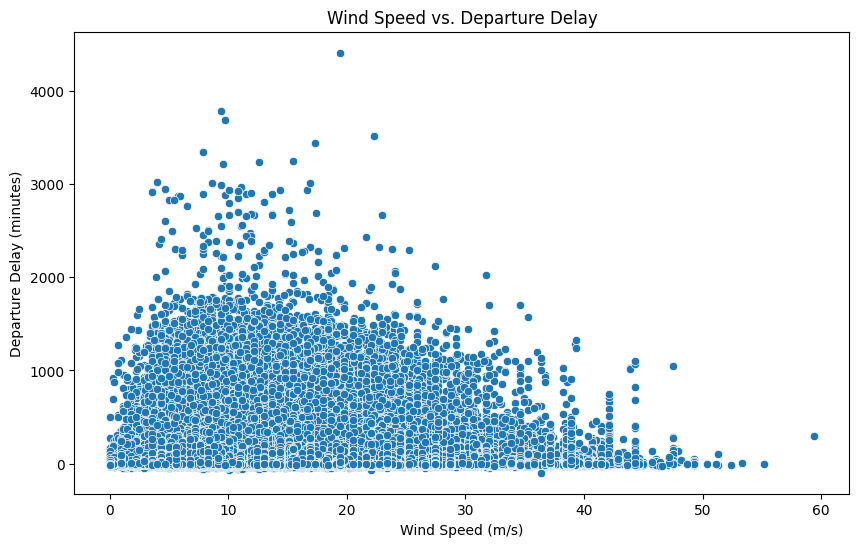

In [36]:
#Wind Speed vs Departure Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wspd', y='Dep_Delay', data=da_flights_weather)
plt.title("Wind Speed vs. Departure Delay")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Departure Delay (minutes)")
plt.show()